In [15]:
import math
from tabulate import tabulate

"""
Question: If we have a bunch of gobblers earning GOO. When 
is the right time to take some GOO and pay for an extra gobbler?

Withdrawing GOO to get an extra Gobbler will reduce the GOO rate
short term but is better for the rate long term.
"""

total_goo = 1000
gobblers = [{"mult": 6},{"mult": 7},{"mult": 8},{"mult": 9}]

def distribute(_gobblers, _total_goo):
    total_mult = sum([x["mult"] for x in _gobblers])
    
    for gobbler in _gobblers:
        goo_amount = _total_goo * (gobbler["mult"] / total_mult)
        gobbler["goo_amount"] = goo_amount

        goo_rate = math.sqrt(gobbler["mult"] * goo_amount)
        gobbler["goo_rate"] = goo_rate
    return _gobblers

def analyze(_total_goo, _gobblers):
    _gobblers = distribute(_gobblers, _total_goo)

    assert _total_goo == round(sum([x["goo_amount"] for x in _gobblers]))
    
    total_mult = sum([x["mult"] for x in _gobblers])
    total_rate = sum([x["goo_rate"] for x in _gobblers])

    print(tabulate([[x["mult"], x["goo_amount"], x["goo_rate"]] for x in _gobblers], headers=["Mult", "Goo Amount", "Goo rate"]))
    print("")
    print("Total Mult:", total_mult)
    print("Total Rate:", total_rate)
    print("Total GOO:", total_goo)
    print("")
    print("")
    
    return total_rate
    
rate_a = analyze(total_goo, gobblers)

"""
What does adding another gobbler to the current distro do to the rate?
"""
gobblers.append({"mult":6})

rate_b = analyze(total_goo, gobblers)

print("Rate delta:", rate_b - rate_a, "\n\n")

"""
What if we paid for the deposit so reduced GOO by 10%
"""

rate_c = analyze(total_goo - 100, gobblers)

print("Rate delta:", rate_c - rate_a, "\n\n")

"""
The rate drops... I guess we need to know what the schedule is for GOO
Then we can figure out how long it will take us to earn back that GOO we used
at the new rate to know if we have overpaid.

Then at any point we should be able to say that x amount of GOO is up for grabs
to incetivise a deposit...

Somebody with a big math brain would be able to solve this.
"""

False

  Mult    Goo Amount    Goo rate
------  ------------  ----------
     6       200         34.641
     7       233.333     40.4145
     8       266.667     46.188
     9       300         51.9615

Total Mult: 30
Total Rate: 173.20508075688775
Total GOO: 1000


  Mult    Goo Amount    Goo rate
------  ------------  ----------
     6       166.667     31.6228
     7       194.444     36.8932
     8       222.222     42.1637
     9       250         47.4342
     6       166.667     31.6228

Total Mult: 36
Total Rate: 189.73665961010275
Total GOO: 1000


Rate delta: 16.531578853214995 


  Mult    Goo Amount    Goo rate
------  ------------  ----------
     6           150          30
     7           175          35
     8           200          40
     9           225          45
     6           150          30

Total Mult: 36
Total Rate: 180.0
Total GOO: 1000


Rate delta: 6.794919243112247 




False

balance: 11454609.584126493


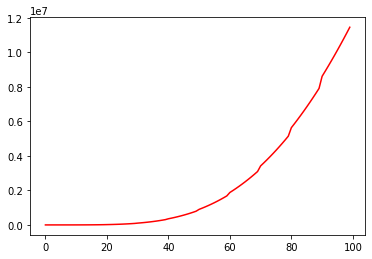

In [55]:
import matplotlib.pyplot as plt

"""
GOO rate is $GOO per day
"""

n_epoch = 100 # 100 days
balance = 1

# Start with 1 gobbler
gobblers = [{"mult":6}]

history = []

for i in range(n_epoch):
    if i % 10:
        balance = balance * 0.95
        gobblers.append({"mult":6})
        
    _gobblers = distribute(gobblers, balance)
    
    total_rate = sum([x["goo_rate"] for x in _gobblers])
    total_goo = sum([x["goo_amount"] for x in _gobblers])
    
    issued = math.sqrt(total_rate * total_goo)
    balance = balance + issued
    
    history.append(balance)
    
print("balance:", balance)
# 2,097,415 <- not buying any more gobblers
# 11,454,609 <- buying gobbler every 10 epochs with 5% balance

plt.plot(range(len(history)), history, color="red")